# Vorbereitung  
## NaJ(Tl)-Szintillationszähler  
Ein Szintillationszähler ist ein Instrument zur Detektion und Quantisierung im Sinne der Energiebestimmung von $\gamma$-Strahlung. Somit eignet er sich $\gamma$-Spektren aufzunehmen.  
![alt text](referenzen/szintillationszaehler.jpg "Szintillationszähler")  
Quelle: Eichler, Kronfeldt, Sahm - "Das neue physikalische Grundpraktikum", 2016  

Im Bild gezeigt der schematische Aufbau bestehend aus Szintillator, Photomultiplier (**S**ekundär**e**lektronen**v**ervielfacher) und (Signal)Verstärker. Der Szintillator selbst besteht häufig aus einem mit Thallium dotierten Natriumjodid-Einkristall. Im Szintillator wird die ionisierende Wechselwirkung der einfallenden Gammas ausgenutzt. Über den Fotoeffekt löst ein Gamma-Quant im NaJ-Kristall ein Elektron aus, welches entweder mit höherer Wahrscheinlichkeit im Kristall selbst unter Wärmeentwicklung wieder absorbiert wird oder mit weniger Wahrscheinlichkeit mit einer der Thallium-Fehlstellen unter Aussendung eines Photons höherer Wellenlänge wieder rekombiniert. Die Anzahl der erzeugten Sekundärphotonen ist proportional der Energie der primären Gammas.  

Das Messsignal ist in der Regel eingebettet in einen kontinuierlichen Untergrund. Dieser entsteht durch Streifschüsse der $\gamma$ und hierdurch entstehende Compton-Photonen geringerer Energie.

Typische zeitliche Auflösung: $10^{-7} s$ bis $10^{-10} s$.  
Energieauflösung für $^{137}\text{Cs}$ Gammas liegt bei $\approx 50 keV$

## $\gamma$-Strahlung, $\gamma$-Spektrometrie  
Als $\gamma$-Strahlung wird elektromagnetische Strahlung bezeichnet, die ihren Ursprung im Atomkern hat. Natürlich vorkommende $\gamma$-Strahlung trägt Energien zwischen $10^3$ und $10^6$ eV.  
Schick ist, dass durch die diskrete Natur der Zustände der Nuklide bei Übergängen jeweils charakteristische Gammas ausgesandt werden. Zusamlmen bilden sie das sogenannte $\gamma$-Linienspektrum welches wiederum zur identifikation einzelner Radionuklide genutzt werden kann. Beispielhaft wäre der Zerfall von $^{60}\text{Co}$ zu $^{60}\text{Ni}$.
\begin{equation}
    ^{60}\text{Co} \longrightarrow ^{60}\text{Ni}^{**} \longrightarrow ^{60}\text{Ni}^{*} + \gamma_{1,17 MeV} \longrightarrow ^{60}\text{Ni} + \gamma_{1,33 MeV}
\end{equation}

## WW von $\gamma$-Strahlung mit Materie, Absorption  
![alt text](referenzen/gamma_in_materie.jpg "Szintillationszähler")  
Quelle: Eichler, Kronfeldt, Sahm - "Das neue physikalische Grundpraktikum", 2016  

Beim Durchgang von $\gamma$-Quanten durch Materie gibt es im Wesentlichen drei Arten der Wechselwirkung die jeweils von der Energie der $\gamma$-Quanten abhängige Häufungswahrscheinlichkeiten besitzen. Diese drei Wechselwirkungsarten sind die Compton-Streuung, Paarbildung und der im Szintillationszähler ausgenutze **Fotoeffekt**. Hieraus folgt, dass es für eine sinnvolle Messung nötig ist die Wahrscheinlichkeit für ein Foto-Event und damit den auf sein Konto gehenden Anteil des Schwächungskoeffizienten zu maximieren.  
Im Bild zu sehen ist, dass für (reines?) $\text{NaJ}$ als Szintillationsmaterial oberhalb einer Energie von $\approx 1 MeV$ de facto keine fotoelektrische Wechselwirkung mehr stattfindet.  
Paarbildung wird erst bei relativ hohen Energien $\geq 10 MeV$ relevant, was bei den hier verwendeten $\gamma$-Strahlern praktisch zu vernachlässigen ist.

## Absorption in Materialien, Halbwertsschichtdicke  
\begin{gather}
    P(d_{1/2}) = \frac{1}{2}P_0 = P_0 \cdot e^{-\mu d} \\
    \Leftrightarrow \\
    d = \frac{ln(2)}{\mu}
\end{gather}
mit der Strahlungsleistung $P$, der Schichtdicke $d$ und dem Schwächungskoeffizienten $\mu$. $\mu$ hängt wiederum von der Quantenenergie ab. Obige Gleichung gilt also nur in annäherungsweise bei kleinen Änderungen der $\gamma$-Energie.

## Radium 226, Folgeprodukte, Zerfallsreihe  
\begin{align}
    ^{226}_{80}\text{Ra} &\longrightarrow ^{222}_{86}\text{Rn} + \alpha (+ \gamma_{186 keV}) \\
    ^{222}_{86}\text{Rn} &\longrightarrow ^{218}_{84}\text{Po} + \alpha \\
    ^{218}_{84}\text{Po} &\longrightarrow ^{214}_{82}\text{Pb} + \alpha \\
    ^{214}_{82}\text{Pb} &\longrightarrow ^{214}_{83}\text{Bi} + \beta^- (+\gamma_{352, 295, 242, 53 keV} \\
    ^{214}_{83}\text{Bi} &\longrightarrow ^{214}_{84}\text{Po} + \beta^- (+\gamma_{609 keV} \\
    ...
\end{align}

## Co-60, Cs-137, Zerfall, $\gamma$-Quanten  
$^{137}Cs$ Fotopeak bei $662 \text{keV}$  
$^{60}Co$ Fotopeak bei $1173$ und $1333 \text{keV}$

# Auswertung  
--> Read The Docs <--  
https://www.scipy.org/
## Messdaten
Zunächst die Importe der Bibliotheken und der Daten:

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Im nächsten Code-Block können die Zeilen, die nicht geplottet werden sollen, auskommentiert werden.

In [2]:
sample1_path = "./messdaten/csv/Ra226-1.csv"
sample2_path = "./messdaten/csv/Ra226-2.csv"
sample3_path = "./messdaten/csv/Co60.csv"

# Opening the data
with open(sample1_path, newline='', encoding='utf-8') as path:
    sample1 = pd.read_csv(path, delimiter=';')
with open(sample2_path, newline='', encoding='utf-8') as path:
    sample2 = pd.read_csv(path, delimiter=';')
with open(sample3_path, newline='', encoding='utf-8') as path:
    sample3 = pd.read_csv(path, delimiter=';')

Die Dicke der Absorberplatten wurde mit einer handelsüblichen Schieblehre mit einer Abweichung von $\pm 0,05 \text{mm}$ gemessen. In den Gesamtfehler der Dicke des Absorbermaterials geht additiv der Fehler jeder Einzelmessung ein.  

Hier wird eine Klasse ``PlottyStuff()`` definiert, die sich um die Berechnung der Dicken, Fehler usw. kümmert.

In [3]:
class PlottyStuff():
    """Class to store and process the aquired data"""

    def __init__(self, sample):
        #  compute the total thickness d of the stack and insert as a new column "d" right after "Stack"

        self.Sample = sample
        if "d" not in self.Sample.columns:
            thicknesses = np.zeros(0)
            position = self.Sample.columns.get_loc("Stack")
            for i, x in enumerate(self.Sample["Stack"]):
                thicknesses = np.append(thicknesses, eval(self.Sample["Stack"][i]))
            self.Sample.insert(position + 1, "d", thicknesses)                       # df.insert(pos, "col name", data)

        # compute the error total error of the thicknesses
        if "dErr" not in self.Sample.columns:
            noPlates = np.zeros(0)
            position = self.Sample.columns.get_loc("d")
            for i, x in enumerate(self.Sample["Stack"]):
                noPlates = np.append(noPlates, x.count("+") + 1)
            self.Sample.insert(position + 1, "dErr", noPlates * 0.05)

        #  Get the labels, might come in handy for the final plots
        # self.range1 = sample.columns.get_loc("Err") - 1
        # self.range2 = sample.columns.get_loc("Err.1") - 1
        self.erange = [label for label in self.Sample.columns.values if label.endswith("keV")]

        # Relative to absolute Error
        self.Sample["Err"] = self.Sample["Err"].multiply(self.Sample.iloc[:, 4] * 0.01)
        self.Sample["Err.1"] = self.Sample["Err.1"].multiply(self.Sample.iloc[:, 6] * 0.01)

        # Here we define some attributes to store and call the final data
        if "None" in self.Sample.values:
            self.matnone = self.Sample.loc[self.Sample["Material"] == "None"]
        if "Fe" in self.Sample.values:
            self.matfe = self.Sample.loc[self.Sample["Material"] == "Fe"]
        if "Cu" in self.Sample.values:
            self.matcu = self.Sample.loc[self.Sample["Material"] == "Cu"]
        if "Al" in self.Sample.values:
            self.matal = self.Sample.loc[self.Sample["Material"] == "Al"]
        if "Pb" in self.Sample.values:
            self.matpb = self.Sample.loc[self.Sample["Material"] == "Pb"]

    # Getter function to look up types absorband materials
    def get_materials(self):
        """Prints out a list of Materials found in the data set"""
        print(pd.unique(self.Sample["Material"]))

``PlottyStuff()``, go do plotty stuff

In [4]:
data1 = PlottyStuff(sample1)
data2 = PlottyStuff(sample2)
data3 = PlottyStuff(sample3)
del sample1, sample2, sample3

Hier werden nun nacheinander die Messdaten extrahiert und aufgetragen. Zu bemerken ist hier im Grunde nur die Funktion ``getattr()``, die als Argumente einerseits das Objekt nimmt, um das es geht und andererseits das Attribut (des Objektes) von INteresse. Output sind dann die im Attribut enthaltenen Werte.

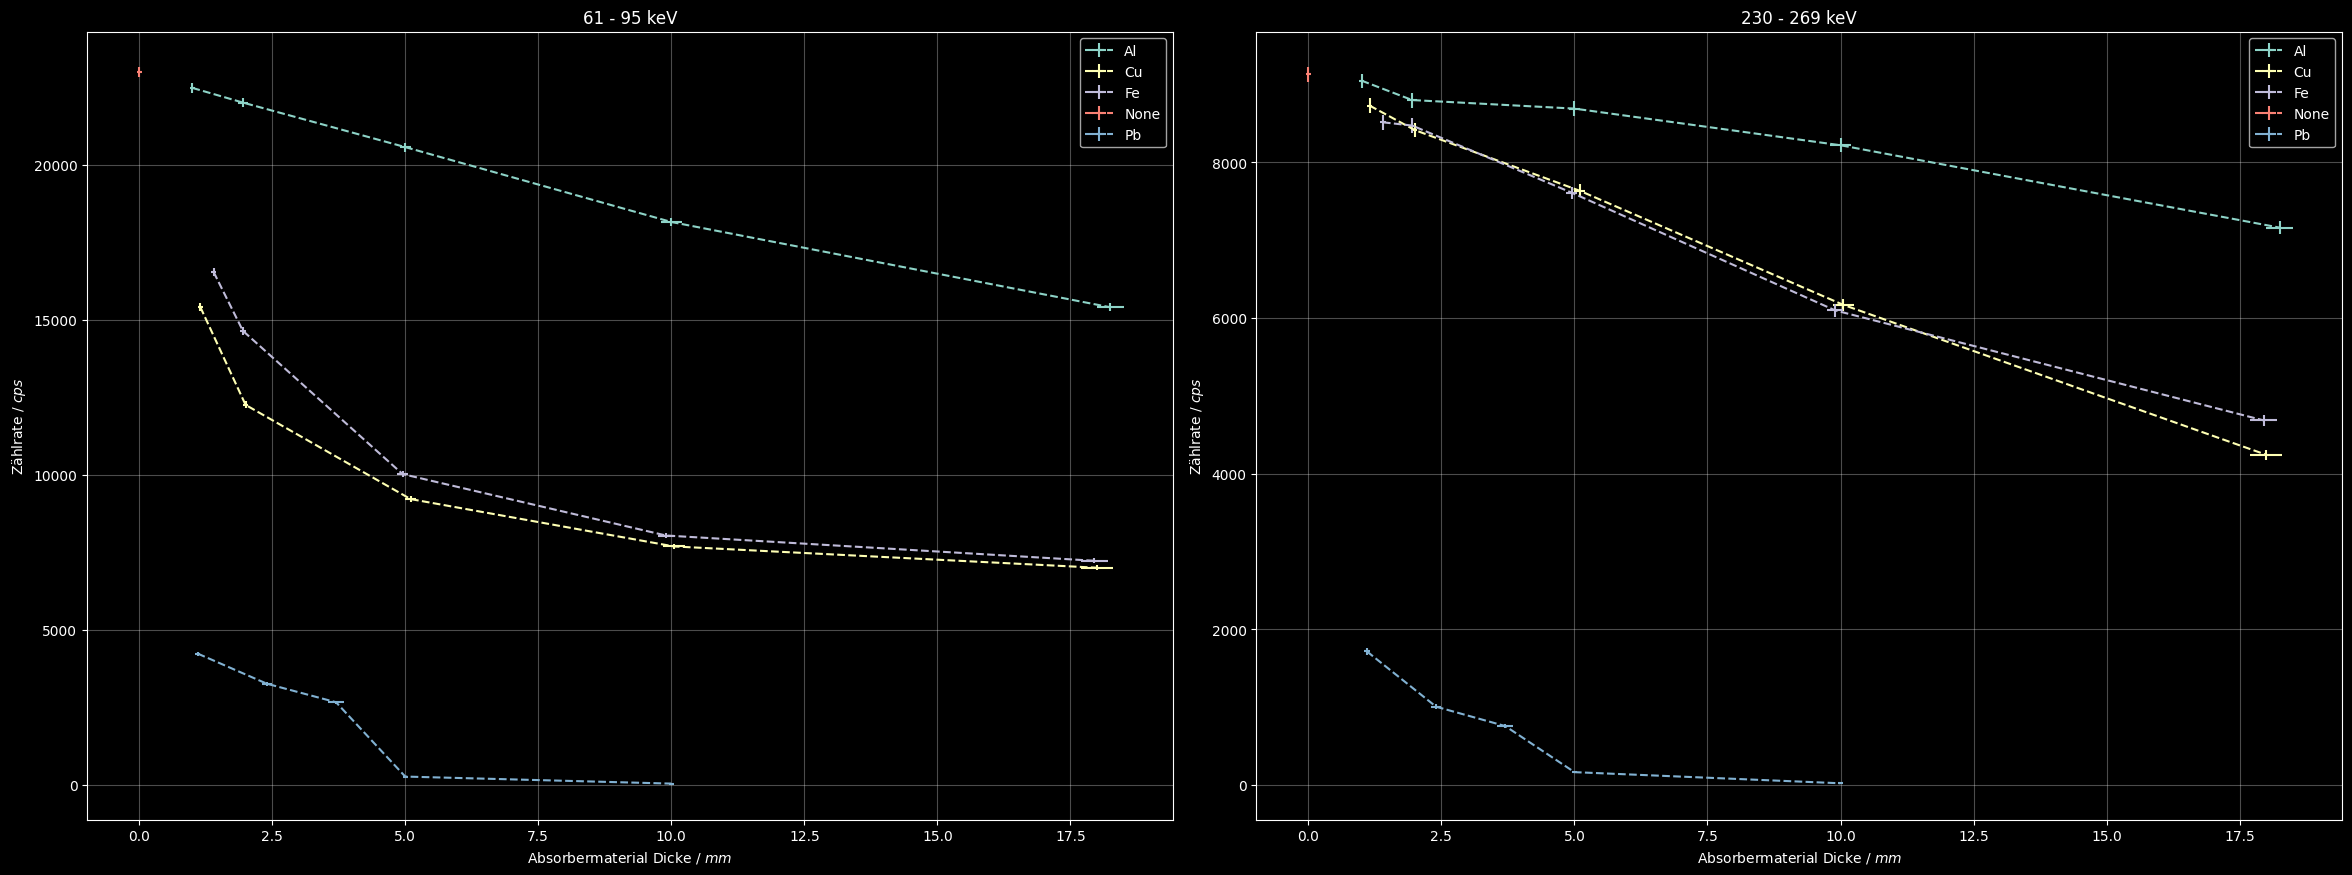

In [5]:
cm = 1/2.54 # inch to cm, imperial like meh

# Nightowl mode
plt.style.use("default")
plt.style.use("dark_background")

# Get the attributes of the PlottyStuff() object in order to have something to loop over
atts = [att for att in dir(data1) if att.startswith("mat")]
mats = [getattr(data1, atts[i]).iloc[0,0] for i, att in enumerate(atts)]

# Define the actual plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(60*cm, 22.5*cm))

# And got for it
for att in atts:
    stuff = getattr(data1, att)
    ax1.errorbar(
        stuff["d"],
        stuff[data1.erange[0]],
        xerr=stuff["dErr"],
        yerr=stuff["Err"],
        linestyle='--')
    ax2.errorbar(
        stuff["d"],
        stuff[data1.erange[1]],
        xerr=stuff["dErr"],
        yerr=stuff["Err.1"],
        linestyle='--')

ax1.set_xlabel("Absorbermaterial Dicke / $mm$")
ax2.set_xlabel("Absorbermaterial Dicke / $mm$")
ax1.set_ylabel("Zählrate / $cps$")
ax2.set_ylabel("Zählrate / $cps$")
ax1.set_title(data1.erange[0])
ax2.set_title(data1.erange[1])
ax1.legend(mats)
ax2.legend(mats)
ax1.grid(axis='both', alpha=.3)
ax2.grid(axis='both', alpha=.3)

plt.tight_layout()
# plt.grid(axis='both', alpha=.3)
plt.savefig("./testplot.png")

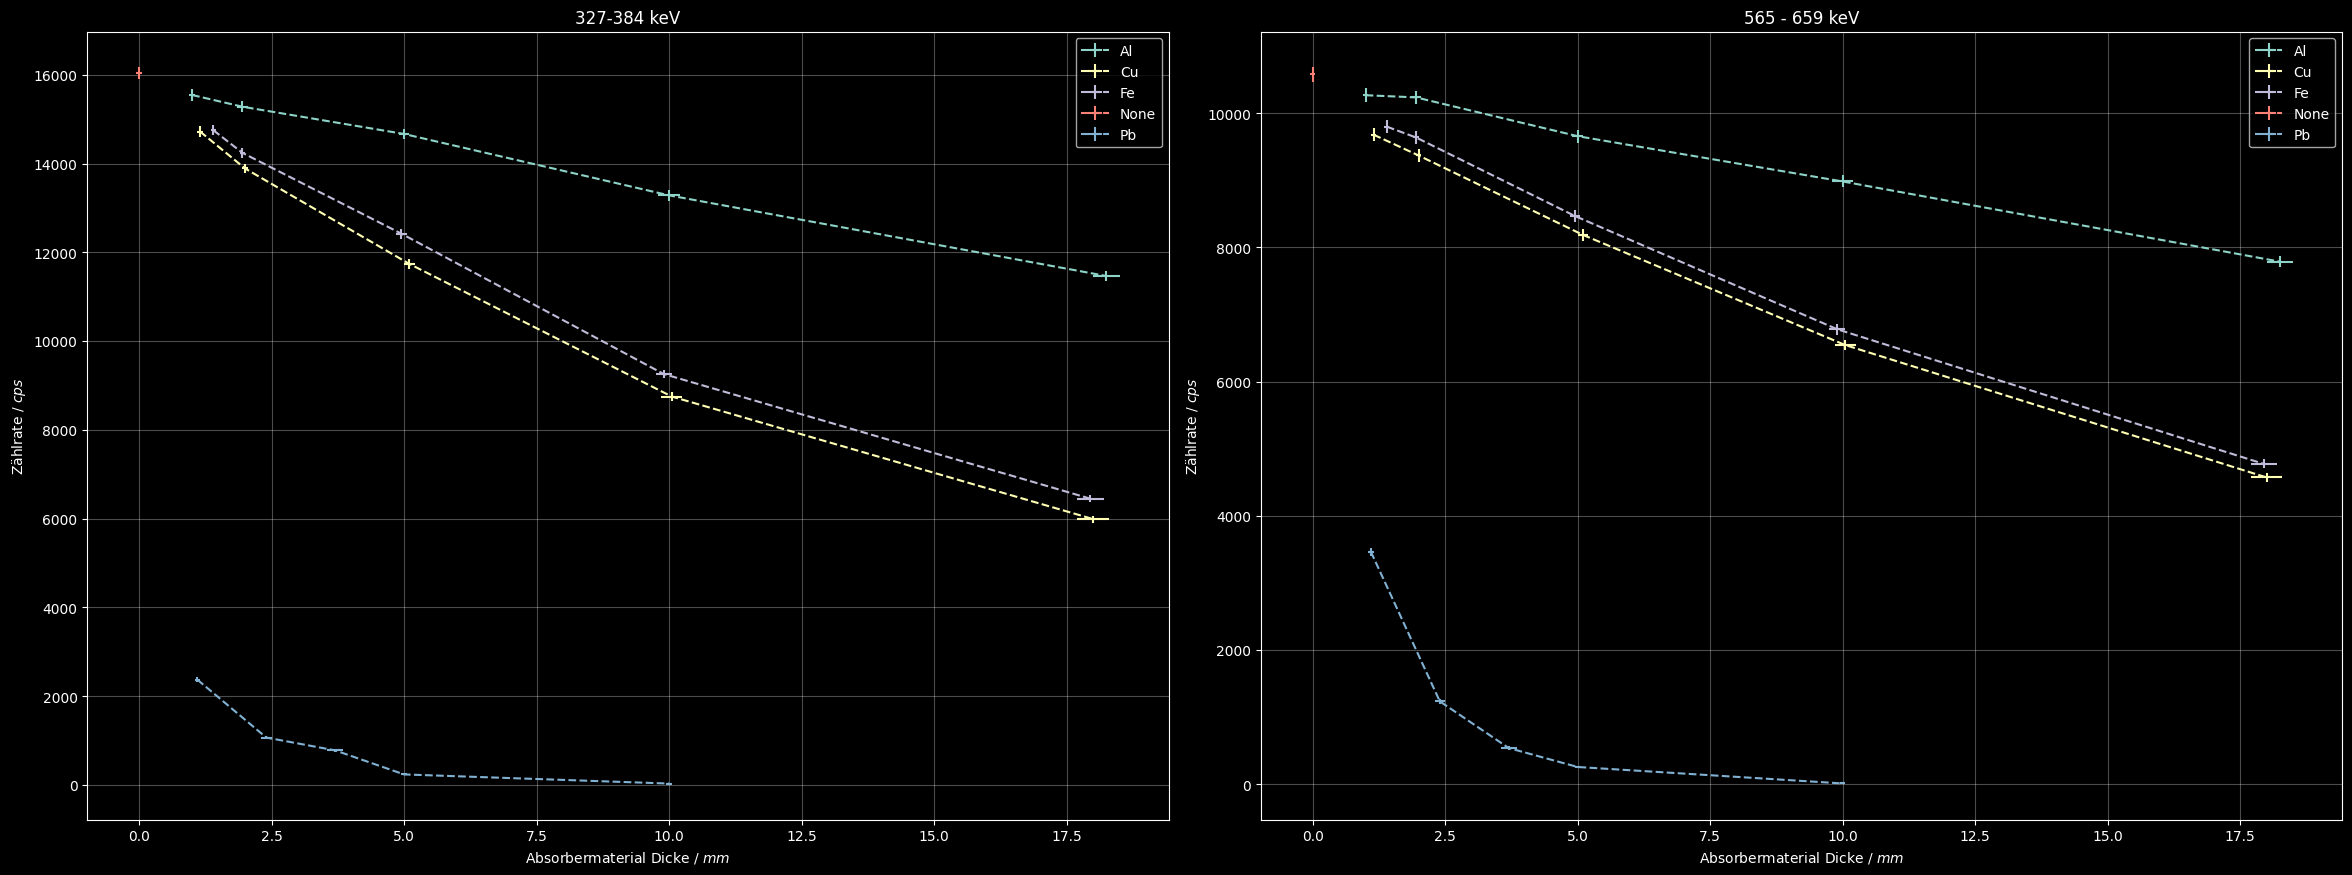

In [6]:
cm = 1/2.54 # inch zu cm
plt.style.use("default")
plt.style.use("dark_background")

atts = [att for att in dir(data2) if att.startswith("mat")]
mats = [getattr(data2, atts[i]).iloc[0,0] for i, att in enumerate(atts)]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(60*cm, 22.5*cm))

for att in atts:
    stuff = getattr(data2, att)
    ax1.errorbar(
        stuff["d"],
        stuff[data2.erange[0]],
        xerr=stuff["dErr"],
        yerr=stuff["Err"],
        linestyle='--')
    ax2.errorbar(
        stuff["d"],
        stuff[data2.erange[1]],
        xerr=stuff["dErr"],
        yerr=stuff["Err.1"],
        linestyle='--')

ax1.set_xlabel("Absorbermaterial Dicke / $mm$")
ax2.set_xlabel("Absorbermaterial Dicke / $mm$")
ax1.set_ylabel("Zählrate / $cps$")
ax2.set_ylabel("Zählrate / $cps$")
ax1.set_title(data2.erange[0])
ax2.set_title(data2.erange[1])
ax1.legend(mats)
ax2.legend(mats)
ax1.grid(axis='both', alpha=.3)
ax2.grid(axis='both', alpha=.3)

plt.tight_layout()
# plt.grid(axis='both', alpha=.3)
plt.savefig("./testplot.png")

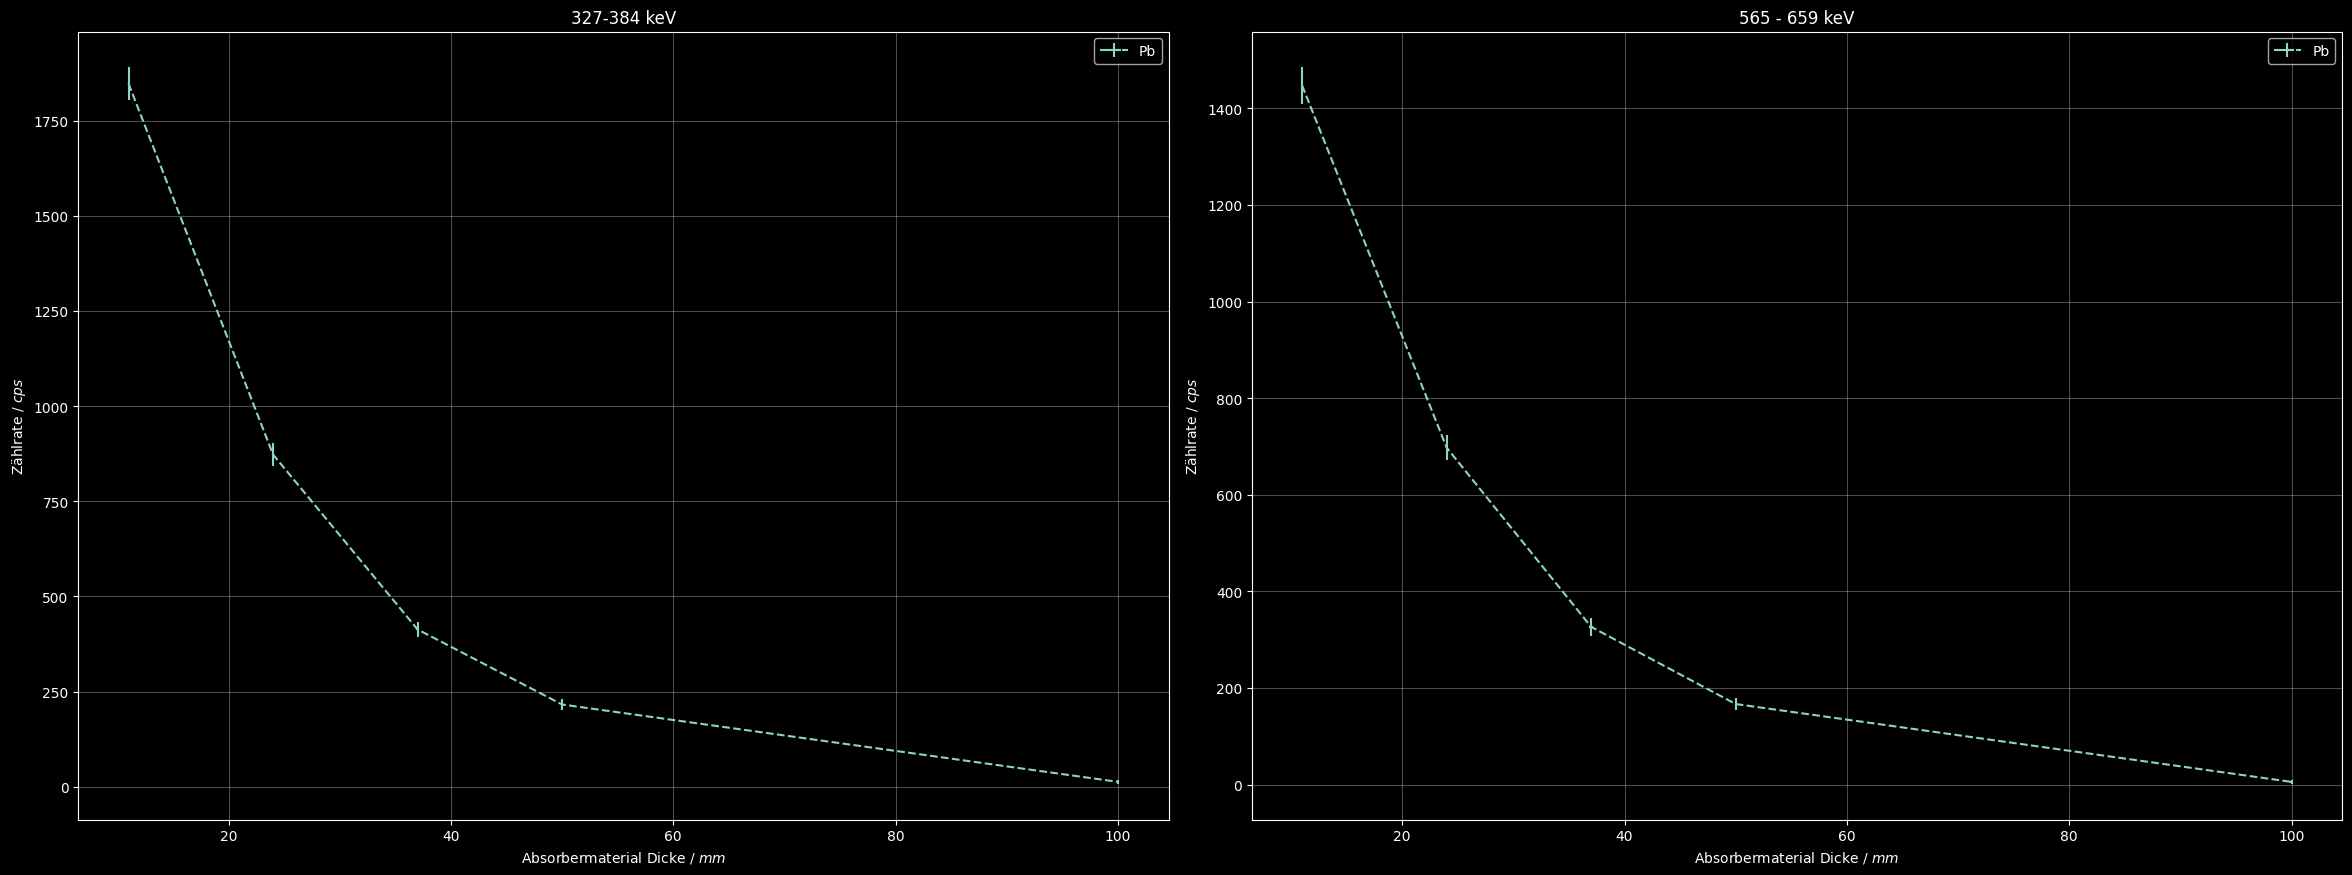

In [7]:
cm = 1/2.54 # inch zu cm
plt.style.use("default")
plt.style.use("dark_background")

atts = [att for att in dir(data3) if att.startswith("mat")]
mats = [getattr(data3, atts[i]).iloc[0,0] for i, att in enumerate(atts)]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(60*cm, 22.5*cm))

for att in atts:
    stuff = getattr(data3, att)
    ax1.errorbar(
        stuff["d"],
        stuff[data3.erange[0]],
        xerr=stuff["dErr"],
        yerr=stuff["Err"],
        linestyle='--')
    ax2.errorbar(
        stuff["d"],
        stuff[data3.erange[1]],
        xerr=stuff["dErr"],
        yerr=stuff["Err.1"],
        linestyle='--')

ax1.set_xlabel("Absorbermaterial Dicke / $mm$")
ax2.set_xlabel("Absorbermaterial Dicke / $mm$")
ax1.set_ylabel("Zählrate / $cps$")
ax2.set_ylabel("Zählrate / $cps$")
ax1.set_title(data3.erange[0])
ax2.set_title(data3.erange[1])
ax1.legend(mats)
ax2.legend(mats)
ax1.grid(axis='both', alpha=.3)
ax2.grid(axis='both', alpha=.3)

plt.tight_layout()
# plt.grid(axis='both', alpha=.3)
plt.savefig("./testplot.png")